<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/KNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples= 1000, n_features = 2,n_redundant = 0, n_classes=2,random_state=31,)

In [26]:
X

array([[-0.6239673 , -1.46976718],
       [ 1.62550202,  1.02041656],
       [-0.64788764, -1.68817104],
       ...,
       [ 1.30004771,  0.94250349],
       [-0.24013772,  1.11568987],
       [ 2.40837268,  1.59687231]])

In [27]:
y

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

<Axes: >

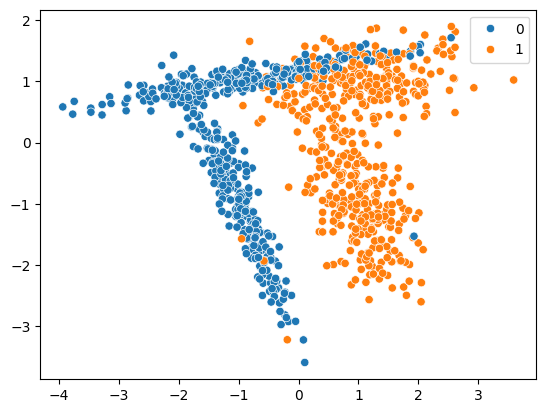

In [28]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], hue = y)

In [29]:
from collections import Counter
print(Counter(y))

Counter({1: 502, 0: 498})


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = knc.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.92
[[132   9]
 [ 15 144]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       141
           1       0.94      0.91      0.92       159

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# **Now, lets play with some hyperparameter tunning.**

In [34]:
params = {
    'n_neighbors':[2,3,4,5,6,7,8],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1, 2]
}

In [35]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, scoring = 'accuracy', refit = True, n_jobs=-1, cv = 5 )

In [36]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [38]:
grid.best_score_

0.9314285714285715

In [39]:
y_pred = grid.predict(X_test)

0.93
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       141
           1       0.95      0.92      0.93       159

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



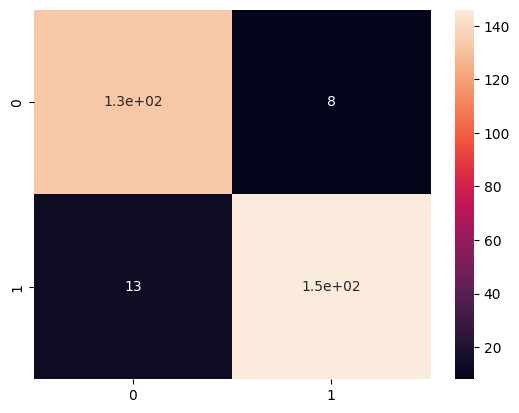

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
print(classification_report(y_test, y_pred))